In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,validation_curve, TimeSeriesSplit, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, precision_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import fasteda
%matplotlib inline

In [3]:
df = pd.read_excel('full_data.xlsx')
df.head()

,Time,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price(EUR/GWh)
0,2016-01-01,1326.789,3351.967,35628.395,41.2,55023.687,16494.803,70313.116,59978.891,5455.079,2205.095,9.7,0.037164
1,2016-02-01,1256.233,4901.266,36277.080,41.2,55934.777,14830.339,60901.101,50334.148,4437.139,2066.531,9.6,0.027102
2,2016-03-01,1354.394,8047.000,27362.268,41.2,57546.386,15801.635,63693.955,53420.475,4432.972,2127.367,9.5,0.027581
3,2016-04-01,1282.061,11269.077,24661.307,41.2,56949.051,13866.405,53587.305,46547.237,3778.374,1991.104,9.4,0.027452
4,2016-05-01,1285.947,13493.892,23264.017,41.2,55841.288,13681.785,50761.393,42774.509,3859.860,2094.338,9.4,0.027448


In [4]:
# Up/down price
df['UD'] = 1*(df['Price(EUR/GWh)'] > df['Price(EUR/GWh)'].shift(1))
df.head()

,Time,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price(EUR/GWh),UD
0,2016-01-01,1326.789,3351.967,35628.395,41.2,55023.687,16494.803,70313.116,59978.891,5455.079,2205.095,9.7,0.037164,0
1,2016-02-01,1256.233,4901.266,36277.080,41.2,55934.777,14830.339,60901.101,50334.148,4437.139,2066.531,9.6,0.027102,0
2,2016-03-01,1354.394,8047.000,27362.268,41.2,57546.386,15801.635,63693.955,53420.475,4432.972,2127.367,9.5,0.027581,1
3,2016-04-01,1282.061,11269.077,24661.307,41.2,56949.051,13866.405,53587.305,46547.237,3778.374,1991.104,9.4,0.027452,0
4,2016-05-01,1285.947,13493.892,23264.017,41.2,55841.288,13681.785,50761.393,42774.509,3859.860,2094.338,9.4,0.027448,0


In [5]:
temp = df.copy()

In [6]:
scaler = StandardScaler()
temp.iloc[:,1:-2] = scaler.fit_transform(temp.iloc[:,1:-2])
temp.set_index('Time',inplace=True)
temp.head()

,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price(EUR/GWh),UD
Time,,,,,,,,,,,,,
2016-01-01,-1.160315,-1.368190,-0.048972,-0.759481,1.043151,0.501018,1.886410,0.264021,2.099374,-0.231661,2.273266,0.037164,0
2016-02-01,-1.515068,-1.144582,0.007476,-0.759481,1.197779,-0.589671,1.048103,-0.951800,0.776577,-1.231448,2.173044,0.027102,0
2016-03-01,-1.021518,-0.690563,-0.768284,-0.759481,1.471297,0.046800,1.296856,-0.562736,0.771163,-0.792495,2.072822,0.027581,1
2016-04-01,-1.385206,-0.225525,-1.003320,-0.759481,1.369919,-1.221317,0.396679,-1.429180,-0.079477,-1.775679,1.972600,0.027452,0
2016-05-01,-1.365667,0.095579,-1.124911,-0.759481,1.181912,-1.342294,0.144981,-1.904771,0.026413,-1.030811,1.972600,0.027448,0


<AxesSubplot:>

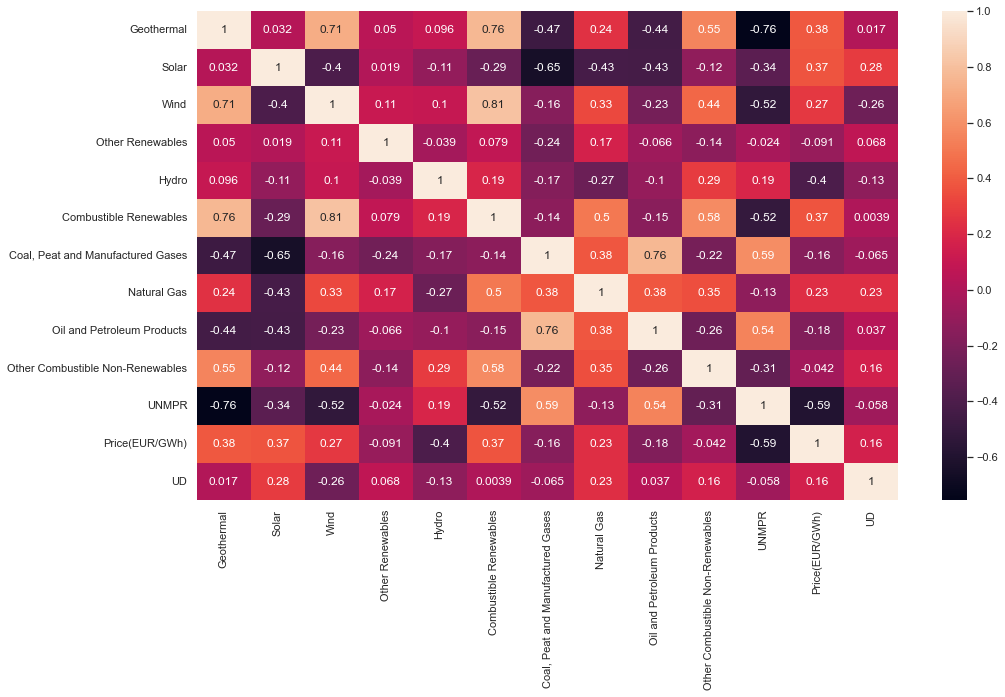

In [7]:
sns.set()
plt.figure(figsize = (14,9))
sns.heatmap(temp.corr(),annot=True)

# Creating a model

## Regression model

<AxesSubplot:>

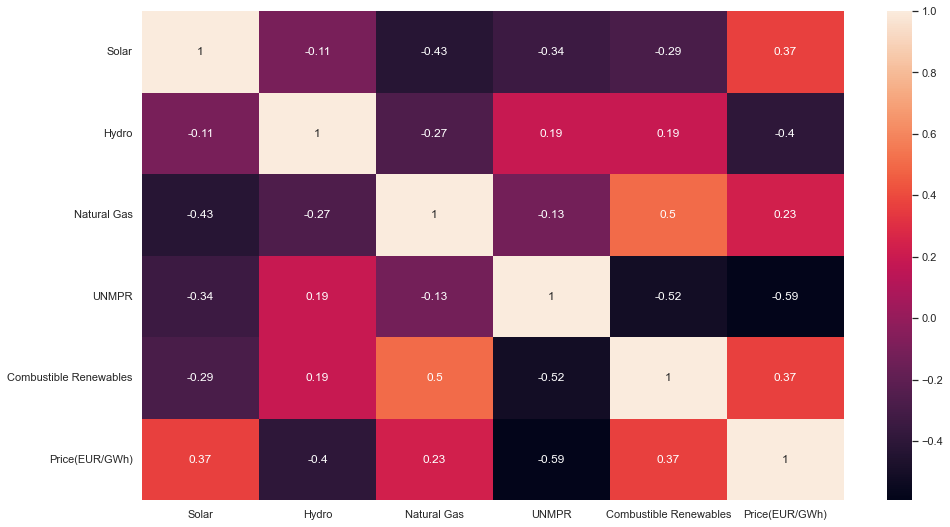

In [8]:
regrcols = ['Solar', 'Hydro',
       'Natural Gas','UNMPR','Combustible Renewables','Price(EUR/GWh)']

sns.set()
regrtemp = temp[regrcols]
plt.figure(figsize = (14,9))
sns.heatmap(temp[regrcols].corr(),annot=True)

In [9]:
rg_FEATURES = ['Solar', 'Hydro', 'Natural Gas', 'UNMPR', 'Combustible Renewables']
rg_TARGET = ['Price(EUR/GWh)']

rX = regrtemp[rg_FEATURES]
ry = regrtemp[rg_TARGET]

In [10]:
rX_train,rX_test,rY_train,rY_test = train_test_split(rX,ry,test_size=0.2,random_state=42)

In [11]:
models = [LinearRegression(),
	      RandomForestRegressor(n_estimators=100,
                                    max_features='sqrt',
                                    max_depth=3,
                                    min_samples_split=5,
                                    random_state=42),
	      KNeighborsRegressor(n_neighbors=4)
         ]

In [12]:
TestModels = pd.DataFrame()
tmp = {}
for model in models:
	m = str(model)
	tmp['Model'] = m[:m.index('(')]    
	model.fit(rX_train, rY_train.values.ravel()) 
	tmp['R2_score'] = r2_score(rY_test, model.predict(rX_test))
	TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

In [13]:
np.round(TestModels,4)

,R2_score
Model,
LinearRegression,0.5887
RandomForestRegressor,0.8890
KNeighborsRegressor,0.8720


### RandomForestRegressor
I guess KNeighborsRegressor is so much overfited, so I decided to take RandomForestRegressor

In [14]:
regr_model = RandomForestRegressor(n_estimators=100,
                                    max_features='sqrt',
                                    max_depth=3,
                                    min_samples_split=5,
                                    random_state=42)
regr_model.fit(rX_train,rY_train.values.ravel())

regy_pred = regr_model.predict(rX_test)
y_full_pred = regr_model.predict(rX)
re_r2 = r2_score(rY_test,regy_pred)

print("R2 Score",re_r2)

R2 Score 0.8890306614858893


Text(0.5, 1.0, 'Real/Predicted price\nR2 Score: 0.89')

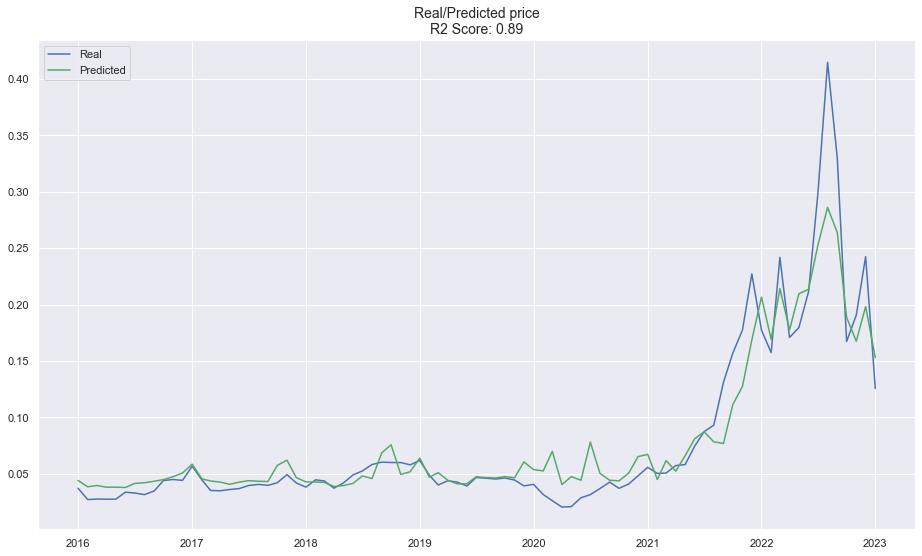

In [15]:
sns.set()
plt.figure(figsize=(14,9))
plt.plot(ry.index,ry,c='b',label='Real')
plt.plot(ry.index,y_full_pred,c='g',label='Predicted')
plt.legend()
plt.title(f'Real/Predicted price\nR2 Score: {np.round(re_r2,2)}',fontdict={'fontsize':14})

In [43]:
print("R2 Score",np.round(re_r2,2))
print('-'*50)
print('Train mean squared error:',np.round(mean_squared_error(rY_train,regr_model.predict(rX_train)),4))
print('Test mean squared error:',np.round(mean_squared_error(rY_test,regy_pred),4))
print('-'*50)
print('Train mean abosolute error:',np.round(mean_absolute_error(rY_train,regr_model.predict(rX_train)),4))
print('Test mean abosolute error:',np.round(mean_absolute_error(rY_test,regy_pred),4))
print('-'*50)
print('Cross-validation score:',np.round(cross_val_score(regr_model, rX, ry.values.ravel(), cv=5, scoring='r2'),2))
print('Cross-validation score (mean):',np.round(cross_val_score(regr_model, rX, ry.values.ravel(), cv=5, scoring='r2').mean(),2))

R2 Score 0.89
--------------------------------------------------
Train mean squared error: 0.0022
Test mean squared error: 0.0006
--------------------------------------------------
Train mean abosolute error: 0.0303
Test mean abosolute error: 0.0174
--------------------------------------------------
Cross-validation score: [ -2.14  -5.6  -63.02  -4.35  -4.52]
Cross-validation score (mean): -15.93


## Classification model

Choosing the best possible features for our model

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ['Geothermal', 'Solar', 'Wind', 'Other Renewables', 'Hydro',
       'Combustible Renewables', 'Coal, Peat and Manufactured Gases',
       'Natural Gas', 'Oil and Petroleum Products',
       'Other Combustible Non-Renewables', 'UNMPR']

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
feachs = selector.fit_transform(temp[predictors], temp["UD"])

In [18]:
clascols = []

for i in range(feachs.shape[1]):
    for j in range(temp.shape[1]):
        if all(feachs[:,i] == temp.iloc[:,j]):
            clascols.append(temp.columns[j])
clascols

['Solar', 'Wind', 'Hydro', 'Natural Gas', 'Other Combustible Non-Renewables']

<AxesSubplot:>

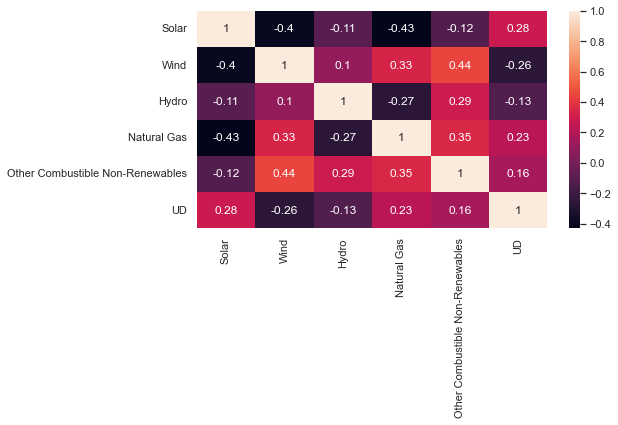

In [19]:
clastemp = temp[clascols + ['UD']]
plt.figure(figsize = (7,4))
sns.heatmap(clastemp.corr(),annot=True)

In [20]:
cl_FEATURES = ['Solar', 'Wind', 'Hydro', 'Natural Gas', 'Other Combustible Non-Renewables']
cl_TARGET = ['UD']

cX = clastemp[cl_FEATURES]
cy = clastemp[cl_TARGET]

In [21]:
cX_train,cX_test,cY_train,cY_test = train_test_split(cX,cy,test_size=0.2,random_state=42)

In [22]:
models = [LogisticRegression(),
          RandomForestClassifier(n_estimators=7,random_state = 42),
	      GaussianNB(),
          GradientBoostingClassifier(n_estimators = 10,random_state = 42)
         ]

In [23]:
TestModels = pd.DataFrame()
tmp = {}
for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    model.fit(cX_train, cY_train.values.ravel())
    cty_pred = model.predict(cX_test)
    tmp['Prec_score'] = precision_score(cY_test, cty_pred)
    tmp['Accuracy Score'] = accuracy_score(cY_test, cty_pred)
    tmp['Recall Score'] = recall_score(cY_test, cty_pred)
    tmp['F1 Score'] = f1_score(cY_test, cty_pred)
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)
np.round(TestModels,2)

,Prec_score,Accuracy Score,Recall Score,F1 Score
Model,,,,
LogisticRegression,0.73,0.71,0.8,0.76
RandomForestClassifier,0.88,0.76,0.7,0.78
GaussianNB,0.82,0.82,0.9,0.86
GradientBoostingClassifier,0.73,0.71,0.8,0.76


### RandomForestClassifier

In [24]:
classification_model = RandomForestClassifier(n_estimators=7,random_state=42)
classification_model.fit(cX_train, cY_train.values.ravel())
cy_pred = classification_model.predict(cX_test)
print("Accuracy Score",np.round(accuracy_score(cY_test,cy_pred),2))
print("Precision Score",np.round(precision_score(cY_test,cy_pred),2))
print("Recall Score",np.round(recall_score(cY_test,cy_pred),2))
print("F1 Score",np.round(f1_score(cY_test,cy_pred),2))
print("AUC Score",np.round(roc_auc_score(cY_test,cy_pred),2))

Accuracy Score 0.76
Precision Score 0.88
Recall Score 0.7
F1 Score 0.78
AUC Score 0.78


In [25]:
f = cy.copy()
f['Pred'] = classification_model.predict(cX)
f['Diff'] = 1*(f['Pred'] != f['UD'])
prec_s = precision_score(f['UD'],f['Pred'])
f.head()

,UD,Pred,Diff
Time,,,
2016-01-01,0,0,0
2016-02-01,0,0,0
2016-03-01,1,1,0
2016-04-01,0,0,0
2016-05-01,0,0,0


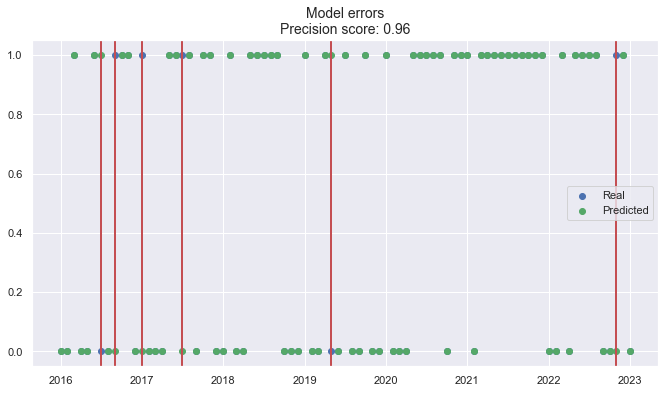

In [26]:
sns.set()
plt.figure(figsize=(10,6))
plt.title(f'Model errors\nPrecision score: {np.round(prec_s,2)}',fontdict = {'fontsize':14})
plt.scatter(f.index,f['UD'],c='b')
plt.scatter(f.index,f['Pred'],c='g')
plt.legend(['Real','Predicted'])
for x in f[f['Diff'] == 1].index:
    plt.axvline(x=x,c='r',linewidth=2)

# SEE THE FUTURE OF OUR FEATURES
### Predict features ( only necessary ones )

In [27]:
#checkdf = pd.DataFrame()
def create_features(df):
    df = pd.DataFrame(df.copy())
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['weekofyear'] = df.index.isocalendar().week
    df['weekofyear'] = df['weekofyear'].astype('int64')
    return df

#checkdf = create_features(clastemp['Other Combustible Non-Renewables'])
#checkdf.head()

In [28]:
def add_lags(df):
    df['lag1'] = df.iloc[:,0].shift(4)
    df['lag2'] = df.iloc[:,0].shift(8)
    df['lag3'] = df.iloc[:,0].shift(12)
    return df

#checkdf = add_lags(checkdf)
#checkdf.head()

In [29]:
def model_features(data):
    tss = TimeSeriesSplit(n_splits=5, test_size=12*1, gap=1)
    data = data.sort_index()

    fold = 0
    preds = []
    scores = []
    for train_idx, val_idx in tss.split(df):
        train = data.iloc[train_idx]
        test = data.iloc[val_idx]

        FEATURES = data.columns[1:]
        TARGET = data.columns[0]

        X_train = train[FEATURES]
        y_train = train[TARGET]

        X_test = test[FEATURES]
        y_test = test[TARGET]

        reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                               n_estimators=1000,
                               early_stopping_rounds=50,
                               objective='reg:linear',
                               max_depth=3,
                               learning_rate=0.01)
        reg.fit(X_train, y_train,
                eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=100)

        y_pred = reg.predict(X_test)
        preds.append(y_pred)
        score = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append(score)

In [30]:
#model_features(dfs['Combustible Renewables'])

In [31]:
def pred_feature(data,n_estimat,ax,pred_length=1,lr = 0.01,):
    FEATURES = data.columns[1:]
    TARGET = data.columns[0]
    
    X_all = data[FEATURES]
    y_all = data[TARGET]
    
    print('FEATURES',FEATURES)
    print('TARGET',TARGET)
    
    reg = xgb.XGBRegressor(base_score=0.5,
                           booster='gbtree',    
                           n_estimators=n_estimat,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=lr)
    reg.fit(X_all, y_all,
            eval_set=[(X_all, y_all)],
            verbose=100)
    
    future = pd.date_range(data.index.max() + pd.DateOffset(months=1),data.index.max() + pd.DateOffset(months=pred_length), freq='1MS')
    future_df = pd.DataFrame(index=future)
    future_df['isFuture'] = True
    data['isFuture'] = False
    data_and_future = pd.concat([data, future_df])
    data_and_future = create_features(data_and_future)
    data_and_future = add_lags(data_and_future)
    
    future_w_features = data_and_future.query('isFuture').copy()
    
    future_w_features['pred'] = reg.predict(future_w_features[FEATURES])
    
    t = pd.DataFrame({'REAL':data_and_future[TARGET],'PREDICTED':reg.predict(data_and_future[FEATURES])},index=data_and_future.index)
    #plt.figure(figsize=(14,9))
    ax.plot(t.index,t['REAL'],c='b',marker='o')
    ax.plot(t.index,t['PREDICTED'],c='r',marker='o')
    ax.set_title(TARGET)
    
    return future_w_features

In [32]:
def ft_prep(data):
    df = create_features(data)
    df = add_lags(df)
    return df

In [33]:
dfs = {}
dfs['Solar'] = ft_prep(temp['Solar'])
dfs['Wind'] = ft_prep(temp['Wind'])
dfs['Natural Gas'] = ft_prep(temp['Natural Gas'])
dfs['Hydro'] = ft_prep(temp['Hydro'])
dfs['UNMPR'] = ft_prep(temp['UNMPR'])
dfs['Other Combustible Non-Renewables'] = ft_prep(temp['Other Combustible Non-Renewables'])
dfs['Combustible Renewables'] = ft_prep(temp['Combustible Renewables'])

FEATURES Index(['quarter', 'month', 'year', 'weekofyear', 'lag1', 'lag2', 'lag3'], dtype='object')
TARGET Solar
[14:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.10834
[100]	validation_0-rmse:0.48739
[200]	validation_0-rmse:0.24599
[300]	validation_0-rmse:0.15356
[400]	validation_0-rmse:0.10827
[479]	validation_0-rmse:0.09066
FEATURES Index(['quarter', 'month', 'year', 'weekofyear', 'lag1', 'lag2', 'lag3'], dtype='object')
TARGET Wind
[14:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.10870
[100]	validation_0-rmse:0.54194
[200]	validation_0-rmse:0.34076
[279]	validation_0-rmse:0.27136

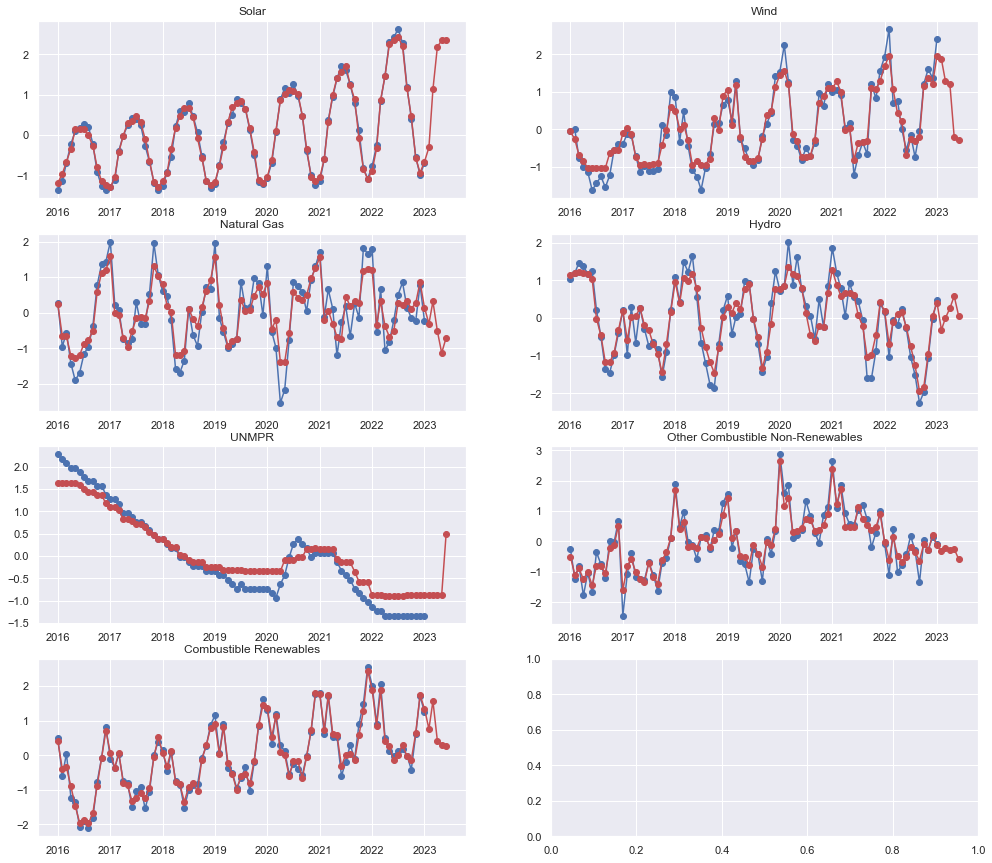

In [34]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(4, 2, figsize=(15, 15))

df_future = pd.DataFrame()
pred_length = 5
df_future['Solar'] = pred_feature(dfs['Solar'],480,ax1,pred_length)['pred']
df_future['Wind'] = pred_feature(dfs['Wind'],280,ax2,pred_length)['pred']
df_future['Natural Gas'] = pred_feature(dfs['Natural Gas'],130,ax3,pred_length,lr=0.02)['pred']
df_future['Hydro'] = pred_feature(dfs['Hydro'],125,ax4,pred_length,lr=0.03)['pred']
df_future['UNMPR'] = pred_feature(dfs['UNMPR'],160,ax5,pred_length,lr=0.01)['pred']
df_future['Other Combustible Non-Renewables'] = pred_feature(dfs['Other Combustible Non-Renewables'],150,ax6,pred_length,lr=0.03)['pred']
df_future['Combustible Renewables'] = pred_feature(dfs['Combustible Renewables'],200,ax7,pred_length,lr=0.03)['pred']

# Classification future predict

In [35]:
df_future

,Solar,Wind,Natural Gas,Hydro,UNMPR,Other Combustible Non-Renewables,Combustible Renewables
2023-02-01,-0.310247,1.867503,-0.308777,-0.315883,-0.873137,-0.308873,0.761451
2023-03-01,1.130433,1.287071,0.315793,0.001359,-0.873137,-0.221263,1.566576
2023-04-01,2.185557,1.207569,-0.520203,0.260378,-0.873137,-0.267997,0.414906
2023-05-01,2.343365,-0.199600,-1.131025,0.583966,-0.873137,-0.244920,0.307019
2023-06-01,2.359702,-0.277141,-0.705701,0.058907,0.494906,-0.575908,0.268645


In [36]:
df_past = temp.copy()
df_past['Future'] = False

In [37]:
cl_X = df_future[cl_FEATURES].copy()
classification_model.fit(cX_test, cY_test.values.ravel())
cl_X['Predicted'] = classification_model.predict(cl_X)
df_past_future = pd.concat([df_past[cl_FEATURES+['UD']],cl_X])

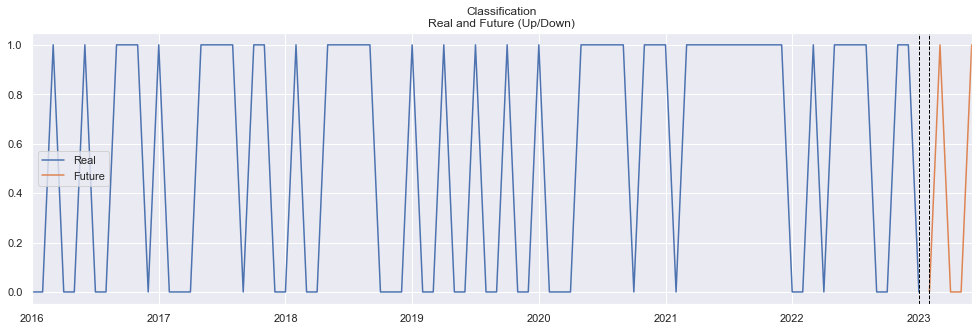

In [38]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
df_past_future[df_past_future['Predicted'].isna()]['UD'].plot(ax=ax, label='Real', title='Classification\nReal and Future (Up/Down)')
df_past_future[df_past_future['UD'].isna()]['Predicted'].plot(ax=ax, label='Future')
ax.axvline('2023-01-01', color='black', ls='--',linewidth=1)
ax.axvline('2023-02-01', color='black', ls='--',linewidth=1)
ax.legend(['Real', 'Future'])
plt.show()

# Regression future predict

In [39]:
regr_X = df_future[rg_FEATURES].copy()
regr_model.fit(rX_test,rY_test.values.ravel())
regr_X['Price(EUR/GWh)'] = regr_model.predict(regr_X)
regr_X['Future'] = True
r_df_past_future = pd.concat([df_past[rg_FEATURES+['Price(EUR/GWh)','Future']],regr_X])

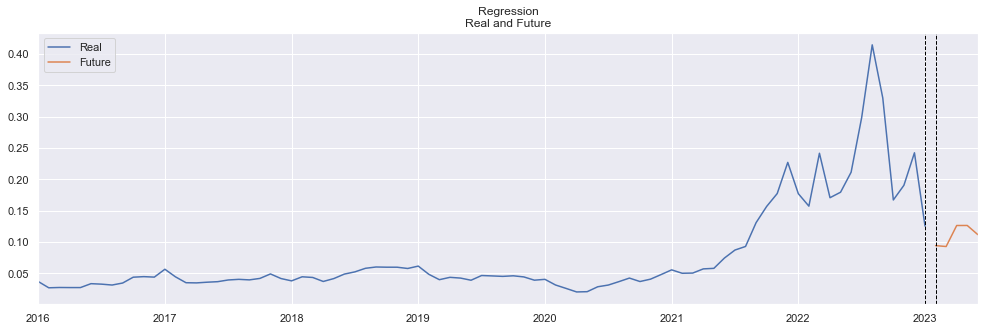

In [40]:
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
r_df_past_future[~r_df_past_future['Future']]['Price(EUR/GWh)'].plot(ax=ax, label='Real', title='Regression\nReal and Future')
r_df_past_future[r_df_past_future['Future']]['Price(EUR/GWh)'].plot(ax=ax, label='Future')
ax.axvline('2023-01-01', color='black', ls='--',linewidth=1)
ax.axvline('2023-02-01', color='black', ls='--',linewidth=1)
ax.legend(['Real', 'Future'])
plt.show()

In [41]:
r_df_past_future[['Price(EUR/GWh)','Future']].tail(10)

,Price(EUR/GWh),Future
2022-09-01,0.329850,False
2022-10-01,0.167224,False
2022-11-01,0.190606,False
2022-12-01,0.242479,False
2023-01-01,0.125556,False
2023-02-01,0.094384,True
2023-03-01,0.092945,True
2023-04-01,0.126460,True
2023-05-01,0.126533,True
2023-06-01,0.111948,True
